In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("./datasets/survey_results_public_2021.csv", index_col='ResponseId')
df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                                          8601
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                                            5467
Developer, front-end                                                                                                                                                                            

In [7]:
front = df.DevType.head().str.count('Developer, front-end').sum()
back = df.DevType.head().str.count('Developer, back-end').sum()
full = df.DevType.head().str.count('Developer, full-stack').sum()
print('front: ' + str(front) + '    back: ' + str(back) + '    full: ' + str(full))
df.DevType.head()

front: 1.0    back: 0.0    full: 1.0


ResponseId
1                                    Developer, mobile
2                                                  NaN
3                                                  NaN
4                                 Developer, front-end
5    Developer, desktop or enterprise applications;...
Name: DevType, dtype: object

In [9]:
col1 = df['MainBranch']
col2 = df.US_State
df_2rows = pd.concat([col1, col2], axis=1)
df_2rows

,MainBranch,US_State
ResponseId,,
1,I am a developer by profession,NaN
2,I am a student who is learning to code,NaN
3,"I am not primarily a developer, but I write co...",NaN
4,I am a developer by profession,NaN
5,I am a developer by profession,NaN
...,...,...
83435,I am a developer by profession,Texas
83436,I am a developer by profession,NaN
83437,I am a developer by profession,New Jersey


In [10]:
data = {
    'apples': [3,2,0,1], # this is not a Series!
    'oranges': [0,3,7,2]
}
testdf = pd.DataFrame(data)
testdf

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [11]:
df.columns = [col.lower() for col in df.columns]
df.columns

Index(['mainbranch', 'employment', 'country', 'us_state', 'uk_country',
       'edlevel', 'age1stcode', 'learncode', 'yearscode', 'yearscodepro',
       'devtype', 'orgsize', 'currency', 'comptotal', 'compfreq',
       'languagehaveworkedwith', 'languagewanttoworkwith',
       'databasehaveworkedwith', 'databasewanttoworkwith',
       'platformhaveworkedwith', 'platformwanttoworkwith',
       'webframehaveworkedwith', 'webframewanttoworkwith',
       'misctechhaveworkedwith', 'misctechwanttoworkwith',
       'toolstechhaveworkedwith', 'toolstechwanttoworkwith',
       'newcollabtoolshaveworkedwith', 'newcollabtoolswanttoworkwith', 'opsys',
       'newstuck', 'newsosites', 'sovisitfreq', 'soaccount', 'sopartfreq',
       'socomm', 'newothercomms', 'age', 'gender', 'trans', 'sexuality',
       'ethnicity', 'accessibility', 'mentalhealth', 'surveylength',
       'surveyease', 'convertedcompyearly'],
      dtype='object')

In [12]:
# df.gender.value_counts()

In [13]:
# condition = ((df['gender'=='Man']) | (df['gender'=='Woman']))
df_manwoman = df[df['gender'].isin(['Man', 'Woman'])]
df_manwoman.gender.value_counts()

Man      74817
Woman     4120
Name: gender, dtype: int64

<AxesSubplot:>

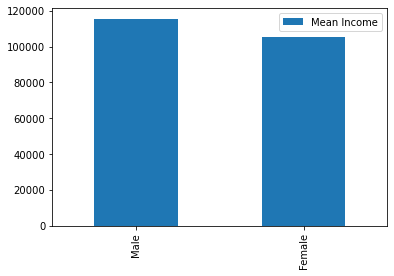

In [15]:
# mean of convertedcompyearly
mean_man = df[df['gender']=='Man'].convertedcompyearly.mean()
mean_woman = df[df['gender']=='Woman'].convertedcompyearly.mean()
mwmean = pd.DataFrame(
    {
    'Mean Income': [mean_man, mean_woman]
    }, index=['Male', 'Female']
)
mwmean.plot(kind='bar')